
# Project (5): Wrangle and Analyze Data
# Bashair Altalhi



## Table of Contents
<ul>
<li><a href="#gather">Gather</a></li>
<li><a href="#Assessing">Assessing</a></li>
<li><a href="#eda">Clean</a></li>
<li><a href="#analyzing">Analyzing</a></li>
</ul>

In [3]:
import pandas as pd
import numpy as np
import requests
import json
import os
import matplotlib.pyplot as plt


<a id='gather'></a>
## Gather

### Enhanced Twitter Archive data

In [4]:
#load twitter-archive-enhanced file
df_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [5]:
#disply the data
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Image Predictions File

In [6]:
#load data programmatically 
#get
url= 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
    

with open('image_predictions.tsv', 'wb') as file:
    file.write(response.content)

In [7]:
#load data
df_image = pd.read_csv('image_predictions.tsv',sep='\t')

In [8]:
#disply the data
df_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Additional Data via the Twitter API

In [7]:
import tweepy
from tweepy import OAuthHandler
from timeit import default_timer as timer
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions

consumer_key = 'xxxxxxx'
consumer_secret = 'xxxxx'
access_token = 'xxxxx'
access_secret = 'xxxxx'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


I download the data from Project page. 

In [9]:
#load the data
df_tweet = pd.read_json('tweet-json copy', lines= True)

        
# disply the data
df_tweet.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [10]:
#Read this tweet_json.txt file into a pandas DataFram
df_tweets = pd.DataFrame(df_tweet)

In [11]:
# Element the columns to " tweet ID, retweet count, and favorite count."
df_tweets = df_tweets.loc[:,['id','favorite_count','retweet_count']]

In [12]:
#display the data
df_tweets.head()

,id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


<a id='Assessing'></a>
## Assessing

### Visual Assessment

In this section, I will have 3 data and will do the visual assessment for each:

##### Enhanced Twitter Archive data

In [13]:
# display the data
df_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


##### Image Predictions data

In [14]:
#display the data
df_image

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


##### Tweet-json

In [15]:
#display
df_tweets

,id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774
...,...,...,...
2349,666049248165822465,111,41
2350,666044226329800704,311,147
2351,666033412701032449,128,47
2352,666029285002620928,132,48


 ### Programmatic Assessments in pandas

##### Enhanced Twitter Archive data

In [16]:
#display the tail of the data
df_archive.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [17]:
#display a sample of the data
df_archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1321,706310011488698368,NaN,NaN,2016-03-06 02:46:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a very sleepy pupper. Thinks it's an ai...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/706310011...,12,10,None,None,None,pupper,None
502,813081950185472002,NaN,NaN,2016-12-25 18:00:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Baron. He's officially festive as h*ck...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/813081950...,11,10,Baron,None,None,None,None
1002,747885874273214464,NaN,NaN,2016-06-28 20:14:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a mighty rare blue-tailed hammer sherk...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747885874...,8,10,a,None,None,None,None
1950,673688752737402881,NaN,NaN,2015-12-07 02:21:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Larry. He doesn't know how to shoe. 9/10 ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673688752...,9,10,Larry,None,None,None,None
654,791821351946420224,NaN,NaN,2016-10-28 01:58:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This little fella really hates ...,6.848310e+17,4.196984e+09,2016-01-06 20:16:44 +0000,"https://vine.co/v/eEZXZI1rqxX,https://vine.co/...",13,10,None,None,None,pupper,None
1973,673213039743795200,NaN,NaN,2015-12-05 18:51:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Dexter. He just got some big news. 10/...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673213039...,10,10,Dexter,None,None,None,None
150,863062471531167744,NaN,NaN,2017-05-12 16:05:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Quinn. She's quite the goofball. ...,NaN,NaN,NaN,"https://www.gofundme.com/helpquinny,https://tw...",13,10,Quinn,None,None,None,None
783,775350846108426240,NaN,NaN,2016-09-12 15:10:21 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Maximus. A little rain won't stop him....,NaN,NaN,NaN,https://vine.co/v/ijmv0PD0XXD,12,10,Maximus,None,None,None,None
2314,666701168228331520,NaN,NaN,2015-11-17 19:35:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a golden Buckminsterfullerene named Jo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666701168...,8,10,a,None,None,None,None
1513,691096613310316544,NaN,NaN,2016-01-24 03:14:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we see one dog giving a puptalk to anothe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/691096613...,11,10,None,None,None,None,None


In [18]:
df_archive['name']

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
          ...   
2351        None
2352           a
2353           a
2354           a
2355        None
Name: name, Length: 2356, dtype: object

In [19]:
df_archive['rating_numerator']

0       13
1       13
2       12
3       13
4       12
        ..
2351     5
2352     6
2353     9
2354     7
2355     8
Name: rating_numerator, Length: 2356, dtype: int64

In [20]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [21]:
df_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [22]:
df_archive[df_archive['in_reply_to_user_id'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [23]:
#check for duplicate in name
df_archive[df_archive.name.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,None,None,None,None,puppo
23,887473957103951883,NaN,NaN,2017-07-19 00:47:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Canela. She attempted some fancy porch...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",You may not have known you needed to see this ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217...,13,10,None,None,None,None,None
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Jubilant Antarctic House Bear. We...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392...,12,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


##### Image Predictions data

In [24]:
df_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [25]:
 df_image.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
361,672828477930868736,https://pbs.twimg.com/media/CVZd7ttWcAEs2wP.jpg,1,sandbar,0.118154,False,stingray,0.075915,False,seashore,0.075125,False
1513,786595970293370880,https://pbs.twimg.com/media/CuqM0fVWAAAboKR.jpg,1,Pembroke,0.709512,True,Cardigan,0.287178,True,chow,0.000570,True
1009,709225125749587968,https://pbs.twimg.com/media/Cdese-zWEAArIqE.jpg,1,Labrador_retriever,0.271109,True,Pomeranian,0.150487,True,golden_retriever,0.145578,True
1392,767122157629476866,https://pbs.twimg.com/media/CqVdiBJWIAEDZB4.jpg,2,toy_poodle,0.873841,True,miniature_poodle,0.059192,True,Irish_terrier,0.035306,True
749,687818504314159109,https://pbs.twimg.com/media/CYufR8_WQAAWCqo.jpg,1,Lakeland_terrier,0.873029,True,soft-coated_wheaten_terrier,0.060924,True,toy_poodle,0.017031,True
398,673680198160809984,https://pbs.twimg.com/media/CVlkid8WoAAqDlB.jpg,1,Samoyed,0.989853,True,Arctic_fox,0.003344,False,chow,0.002802,True
1885,847842811428974592,https://pbs.twimg.com/media/C8QkidrVYAQXQh7.jpg,1,Bernese_mountain_dog,0.951337,True,Greater_Swiss_Mountain_dog,0.016849,True,Appenzeller,0.010849,True
47,666817836334096384,https://pbs.twimg.com/media/CUEDSMEWEAAuXVZ.jpg,1,miniature_schnauzer,0.496953,True,standard_schnauzer,0.285276,True,giant_schnauzer,0.073764,True
161,668932921458302977,https://pbs.twimg.com/media/CUiG6_ZXAAAPaw_.jpg,1,standard_poodle,0.237638,True,Old_English_sheepdog,0.195573,True,toy_poodle,0.144658,True
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False


In [26]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [27]:
df_image.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


##### Tweet-json

In [28]:
df_tweets.head()

,id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


In [29]:
df_tweets.sample(10)

,id,favorite_count,retweet_count
1769,678334497360859136,1427,304
1412,698710712454139905,2710,774
1634,684200372118904832,2394,1177
2067,671134062904504320,796,212
1838,675888385639251968,2581,1067
229,847978865427394560,0,3652
2164,669363888236994561,669,252
2121,670385711116361728,593,234
2069,671115716440031232,1436,842
44,883482846933004288,46860,10407


In [30]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   favorite_count  2354 non-null   int64
 2   retweet_count   2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [31]:
df_tweets.describe()

,id,favorite_count,retweet_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,8080.968564,3164.797366
std,6.852812e+16,11814.771334,5284.770364
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,1415.000000,624.500000
50%,7.194596e+17,3603.500000,1473.500000
75%,7.993058e+17,10122.250000,3652.000000
max,8.924206e+17,132810.000000,79515.000000


In [32]:
df_tweets.retweet_count.value_counts()

1972     5
3652     5
83       5
146      4
61       4
        ..
8209     1
19       1
2068     1
30742    1
0        1
Name: retweet_count, Length: 1724, dtype: int64

In [33]:
df_tweets.favorite_count.value_counts()

0        179
610        3
345        3
2918       3
1691       3
        ... 
33345      1
814        1
23108      1
2630       1
8143       1
Name: favorite_count, Length: 2007, dtype: int64

#### Quality
##### `df _archive` table

 * Misssing value in the following:
   * 'in_reply_to_status' the total of values are 78 and it is supposed to be 2356.
   * 'in_reply_to_user_id' the total of values are 78 and  it is supposed to be 2356.
   * 'retweted_status_id' the total of values are 181 and  it is supposed to be 2356.
   * 'retweted_status_user_id' the total of values are 181 and  it is supposed to be 2356.
   * 'retweted_status_timestamp' the total of values are 181 and  it is supposed to be 2356.
   * 'expanded_urls' the total of values are 2297 and  it is supposed to be 2356.
 * 'timestamp' is object not datetime.
 * 'tweet_id' is int not object.
 * 'retwetted_status_timestamp' is object not datetime (removed later no need to change).
 * ' name' some names are  enter as 'Nane' and 'a'.
 * 'rating_numerator' type is int not float.
 * 'rating_denominator' type is int not float.
 * 'dog_stages' should be catagory.


##### `df_tweets` table 

* 'id' is int not object.
* 'retweet_count' and 'favorite_count' is floats not integers.

##### `df_image` table 

'id' is int not object.

#### Tidiness

* 'puppo', 'doggo', 'floofer', 'pupper' are dog "stage" should be in one cloumn.
*  Merge df_archive, df_image,  and df_tweets into one by tweeter Id.

<a id='eda'></a>
## Clean

In [34]:
archive_clean = df_archive.copy()
image_clean = df_image.copy()
tweet_clean = df_tweets.copy()

### Qulity 
#### Missing value

#### Define
* Removing the missing value in `df _archive` by dropping rows
  * 'expanded_urls' the total of values are 2297 and it is supposed to be 2356.

##### Code

In [35]:
# drop the row with missing value
archive_clean.dropna(subset=['expanded_urls'], axis=0, inplace =True )

##### Test

In [36]:
#disply the data info
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2297 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2297 non-null   object 
 4   source                      2297 non-null   object 
 5   text                        2297 non-null   object 
 6   retweeted_status_id         180 non-null    float64
 7   retweeted_status_user_id    180 non-null    float64
 8   retweeted_status_timestamp  180 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2297 non-null   int64  
 11  rating_denominator          2297 non-null   int64  
 12  name                        2297 non-null   object 
 13  doggo                       2297 

It works the total values are 2297.

#### Define
* Removing the missing value in `df _archive` by dropping the column
  * 'in_reply_to_status' the total of values are 78 and it is supposed to be 2356.
  * 'in_reply_to_user_id' the total of values are 78 and it is supposed to be 2356.
  * 'retweted_status_id' the total of values are 181 and it is supposed to be 2356.
  * 'retweted_status_user_id' the total of values are 181 and it is supposed to be 2356.
  * 'retweted_status_timestamp' the total of values are 181 and it is supposed to be 2356.
  

##### Code

In [37]:
#drop columns with missing value.
archive_clean.dropna(axis='columns', inplace= True)

##### Test

In [38]:
#display the data
archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [39]:
#disply the data info
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2297 non-null   int64 
 1   timestamp           2297 non-null   object
 2   source              2297 non-null   object
 3   text                2297 non-null   object
 4   expanded_urls       2297 non-null   object
 5   rating_numerator    2297 non-null   int64 
 6   rating_denominator  2297 non-null   int64 
 7   name                2297 non-null   object
 8   doggo               2297 non-null   object
 9   floofer             2297 non-null   object
 10  pupper              2297 non-null   object
 11  puppo               2297 non-null   object
dtypes: int64(3), object(9)
memory usage: 233.3+ KB


### Tidness 

#### Defne

* Creating new column 'dog stage' contans 'puppo', 'doggo', 'floofer', and 'pupper' by combining the columns.
* convert 'dog stage to category.

#### Code

In [44]:
# handle none
archive_clean.doggo.replace('None', '', inplace=True)
archive_clean.floofer.replace('None', '', inplace=True)
archive_clean.pupper.replace('None', '', inplace=True)
archive_clean.puppo.replace('None', '', inplace=True)

# merge into column
archive_clean['dog_stage'] = archive_clean.doggo + archive_clean.floofer + archive_clean.pupper + archive_clean.puppo

# handle multiple stages
archive_clean.loc[archive_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
archive_clean.loc[archive_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'
archive_clean.loc[archive_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'

# handle missing values
archive_clean.loc[archive_clean.dog_stage == '', 'dog_stage'] = np.nan

In [45]:
#convert to category
archive_clean['dog_stage'] = archive_clean['dog_stage'].astype('category')

#### Test

In [46]:
#display the data
archive_clean

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,,,,,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,,,,,NaN
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,,,,,NaN
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,,,,,NaN
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,,,,,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,,,,,NaN
2352,666044226329800704,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,a,,,,,NaN
2353,666033412701032449,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,a,,,,,NaN
2354,666029285002620928,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,a,,,,,NaN


In [48]:
# check the type
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2355
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   tweet_id            2297 non-null   int64   
 1   timestamp           2297 non-null   object  
 2   source              2297 non-null   object  
 3   text                2297 non-null   object  
 4   expanded_urls       2297 non-null   object  
 5   rating_numerator    2297 non-null   int64   
 6   rating_denominator  2297 non-null   int64   
 7   name                2297 non-null   object  
 8   doggo               2297 non-null   object  
 9   floofer             2297 non-null   object  
 10  pupper              2297 non-null   object  
 11  puppo               2297 non-null   object  
 12  dog_stage           374 non-null    category
dtypes: category(1), int64(3), object(9)
memory usage: 235.9+ KB


In [49]:
#check the value of dog stages
archive_clean['dog_stage'].value_counts()

pupper            243
doggo              80
puppo              28
doggo, pupper      12
floofer             9
doggo, puppo        1
doggo, floofer      1
Name: dog_stage, dtype: int64

## Qulity

#### Define
* Converting 'timestamp' to datetime by using pd.to_datetime.

##### Code

In [50]:
#Convert object to datetime
archive_clean['timestamp'] = pd.to_datetime(archive_clean['timestamp'], format='%Y-%m-%d %H:%M:%S')


##### Test

In [51]:
#check the data type
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2355
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2297 non-null   int64              
 1   timestamp           2297 non-null   datetime64[ns, UTC]
 2   source              2297 non-null   object             
 3   text                2297 non-null   object             
 4   expanded_urls       2297 non-null   object             
 5   rating_numerator    2297 non-null   int64              
 6   rating_denominator  2297 non-null   int64              
 7   name                2297 non-null   object             
 8   doggo               2297 non-null   object             
 9   floofer             2297 non-null   object             
 10  pupper              2297 non-null   object             
 11  puppo               2297 non-null   object             
 12  dog_stage           374 non-null  

##### Define

* Converting 'tweet_id' to string in `archive_clean` and `image_clean`
* Converting 'id' to string in `tweet_clean`

##### Code

In [52]:
#convert to string
archive_clean['tweet_id'] = archive_clean['tweet_id'].astype(str)

In [53]:
#convert to string
image_clean['tweet_id'] = image_clean['tweet_id'].astype(str)

In [54]:
#convert to string
tweet_clean['id'] = tweet_clean['id'].astype(str)

##### Test

In [55]:
#check the type
archive_clean['tweet_id'].describe()

count                   2297
unique                  2297
top       685315239903100929
freq                       1
Name: tweet_id, dtype: object

In [56]:
#check the type
image_clean['tweet_id'].describe()

count                   2075
unique                  2075
top       685315239903100929
freq                       1
Name: tweet_id, dtype: object

In [57]:
#check the type
tweet_clean['id'].describe()

count                   2354
unique                  2354
top       765222098633691136
freq                       1
Name: id, dtype: object

##### Define
* Replacing 'Nane' and 'a' in 'name column by NaN in `archive_clean`.

##### Code

In [58]:
#Replace None by NaN
archive_clean['name'].replace(to_replace=['None'], value=np.nan, inplace=True)

In [59]:
#Replace 'a' by NaN
archive_clean['name'].replace(to_replace=['a'], value=np.nan, inplace=True)

##### Test

In [60]:
#check 
archive_clean.sample(50)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
29,886366144734445568,2017-07-15 23:25:31+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Roscoe. Another pupper fallen victim t...,https://twitter.com/dog_rates/status/886366144...,12,10,Roscoe,,,pupper,,pupper
1994,672604026190569472,2015-12-04 02:31:10+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a baby Rand Paul. Curls for days. 11/1...,https://twitter.com/dog_rates/status/672604026...,11,10,NaN,,,,,NaN
1249,711306686208872448,2016-03-19 21:41:44+00:00,"<a href=""http://twitter.com/download/iphone"" r...",What hooligan sent in pictures w/out a dog in ...,https://twitter.com/dog_rates/status/711306686...,3,10,NaN,,,,,NaN
568,802185808107208704,2016-11-25 16:22:55+00:00,"<a href=""http://twitter.com/download/iphone"" r...","RT @ChinoChinako: They're good products, Brent...",https://twitter.com/ChinoChinako/status/800065...,13,10,NaN,,,,,NaN
1280,708834316713893888,2016-03-13 01:57:25+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Malikai. He was rolling around having fun...,https://twitter.com/dog_rates/status/708834316...,10,10,Malikai,,,,,NaN
2301,667044094246576128,2015-11-18 18:17:59+00:00,"<a href=""http://twitter.com/download/iphone"" r...",12/10 gimme now https://t.co/QZAnwgnOMB,https://twitter.com/dog_rates/status/667044094...,12,10,NaN,,,,,NaN
2047,671518598289059840,2015-12-01 02:38:04+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Scruffers. He's being violated on mult...,https://twitter.com/dog_rates/status/671518598...,9,10,Scruffers,,,,,NaN
1450,695816827381944320,2016-02-06 03:50:33+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a dog enjoying a sunset. 11/10 would tr...,https://twitter.com/dog_rates/status/695816827...,11,10,NaN,,,,,NaN
2212,668587383441514497,2015-11-23 00:30:28+00:00,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Never forget this vine. You will not stop watc...,https://vine.co/v/ea0OwvPTx9l,13,10,the,,,,,NaN
2036,671729906628341761,2015-12-01 16:37:44+00:00,"<a href=""http://twitter.com/download/iphone"" r...",I'm just going to leave this one here as well....,https://twitter.com/dog_rates/status/671729906...,13,10,NaN,,,,,NaN


#### Define
* Converting 'retweet_count' and 'favorite_count' is to integers. 

#### Code

In [61]:
#convert retweet count to integers
tweet_clean['retweet_count'] = tweet_clean['retweet_count'].astype(int)

In [62]:
#convert favorite count to integers
tweet_clean['favorite_count'] = tweet_clean['favorite_count'].astype(int)

#### Test

In [63]:
# check type
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              2354 non-null   object
 1   favorite_count  2354 non-null   int32 
 2   retweet_count   2354 non-null   int32 
dtypes: int32(2), object(1)
memory usage: 36.9+ KB


#### Define 
* Renaming 'id' to 'tweet_id' in `tweet_clean`

#### Code

In [64]:
tweet_clean.rename(columns={'id': 'tweet_id'}, inplace=True)

#### Test

In [65]:
tweet_clean.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


#### Define

* Converting 'rating_numerator' type to float.
* Converting 'rating_denominator' type to float.

#### Code

In [66]:
#convert numerator
archive_clean['rating_numerator'] = archive_clean['rating_numerator'].astype(float)

In [67]:
#convert denominator
archive_clean['rating_denominator'] = archive_clean['rating_denominator'].astype(float)

In [68]:
#extract
rating = archive_clean.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
rating.columns = ['rating_numerator', 'rating_denominator']

#### Test

In [69]:
#check the data type
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2355
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2297 non-null   object             
 1   timestamp           2297 non-null   datetime64[ns, UTC]
 2   source              2297 non-null   object             
 3   text                2297 non-null   object             
 4   expanded_urls       2297 non-null   object             
 5   rating_numerator    2297 non-null   float64            
 6   rating_denominator  2297 non-null   float64            
 7   name                1556 non-null   object             
 8   doggo               2297 non-null   object             
 9   floofer             2297 non-null   object             
 10  pupper              2297 non-null   object             
 11  puppo               2297 non-null   object             
 12  dog_stage           374 non-null  

In [70]:
#disply
archive_clean.sample(20)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
1730,679854723806179328,2015-12-24 02:42:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Bruce. He's a rare pup. Covered in Fro...,https://twitter.com/dog_rates/status/679854723...,7.0,10.0,Bruce,,,,,NaN
1777,677918531514703872,2015-12-18 18:29:07+00:00,"<a href=""http://twitter.com/download/iphone"" r...","""Everything looks pretty good in there. Make s...",https://twitter.com/dog_rates/status/677918531...,10.0,10.0,NaN,,,,,NaN
10,890006608113172480,2017-07-26 00:31:25+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. He is a South Australian decksha...,https://twitter.com/dog_rates/status/890006608...,13.0,10.0,Koda,,,,,NaN
979,749981277374128128,2016-07-04 15:00:45+00:00,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,1776.0,10.0,Atticus,,,,,NaN
1950,673688752737402881,2015-12-07 02:21:29+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Larry. He doesn't know how to shoe. 9/10 ...,https://twitter.com/dog_rates/status/673688752...,9.0,10.0,Larry,,,,,NaN
1640,684147889187209216,2016-01-04 23:02:22+00:00,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Sweets the English Bulldog. Waves back...,https://vine.co/v/ib2nTOEuuOI,12.0,10.0,Sweets,,,pupper,,pupper
2303,666996132027977728,2015-11-18 15:07:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Carll. He wants to be a donkey. But al...,https://twitter.com/dog_rates/status/666996132...,10.0,10.0,Carll,,,,,NaN
1932,674024893172875264,2015-12-08 00:37:11+00:00,"<a href=""http://twitter.com/download/iphone"" r...",When you realize it doesn't matter how hard yo...,https://twitter.com/dog_rates/status/674024893...,10.0,10.0,NaN,,,,,NaN
389,826476773533745153,2017-01-31 17:06:32+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Pilot. He has mastered the synchronize...,https://twitter.com/dog_rates/status/826476773...,12.0,10.0,Pilot,doggo,,,,doggo
24,887343217045368832,2017-07-18 16:08:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",You may not have known you needed to see this ...,https://twitter.com/dog_rates/status/887343217...,13.0,10.0,NaN,,,,,NaN


## Tidness

#### Define

Merging archive_clean, image_clean,  and tweet_clean into one by tweeter Id

#### Code

In [71]:
#join the  datesets archive_clean and image_clean
df_list = [archive_clean, image_clean, tweet_clean]
df_all = pd.concat(df_list)

#### Test

In [72]:
#display
df_all.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
# save the merge dataframe to a csv file
df_all.to_csv('twitter_archive_master.csv', index=False)

<a id='analyzing'></a>
## Analyzing

#### I am going to answer three questions based on the dataset.

## What is the most frequent name of the dogs?

#### I would like to find the most common name that people choose.

In [74]:
# count of the dog name
df_all['name'].value_counts()

Charlie    12
Lucy       11
Cooper     11
Oliver     11
Tucker     10
           ..
Rorie       1
Walker      1
Jo          1
Carll       1
Tuck        1
Name: name, Length: 955, dtype: int64

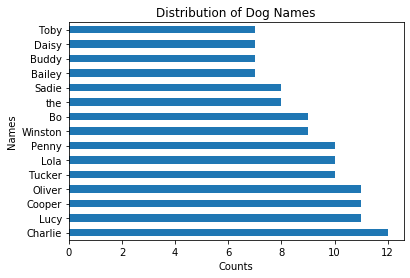

In [75]:
# rank the names frequency in a descending order
df_all.name.value_counts().sort_values(ascending =False)[:15].plot(kind = 'barh')
plt.title('Distribution of Dog Names')
plt.xlabel('Counts')
plt.ylabel('Names');
#Save
plt.savefig('Dog_names.png')

#### The figure shows that most common names are Charlie, Lucy, Oliver, and Cooper.

## Which dog stage people like to have?

In [77]:
# count dog stages
print(df_all['dog_stage'].value_counts())

pupper            243
doggo              80
puppo              28
doggo, pupper      12
floofer             9
doggo, puppo        1
doggo, floofer      1
Name: dog_stage, dtype: int64


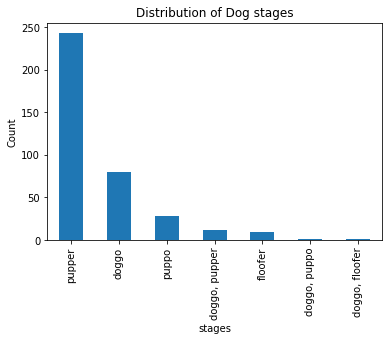

In [78]:
#plot the dog stages
df_all.dog_stage.value_counts()[:10].plot(kind = 'bar')
plt.title('Distribution of Dog stages')
plt.xlabel('stages')
plt.ylabel('Count');

#Save
plt.savefig('Dog_stages.png')

#### People like to have pupper.

## What is the dog rate distrbution?

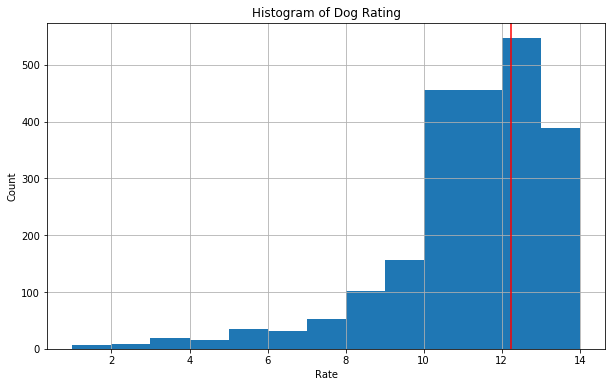

In [79]:
#plot the rating_numerator
bin_values = np.arange(start=1, stop=15, step=1)
df_all['rating_numerator'].hist(bins=bin_values, figsize=[10,6])
plt.axvline(x= df_all['rating_numerator'].mean(),color='red', linestyle='-',label ='Mean')    
# Add labels
plt.title('Histogram of Dog Rating')
plt.xlabel('Rate')
plt.ylabel('Count')
#save 
plt.savefig('Dog_rating.png')

#### The figure shows that max rating is 14 and most rating is a round 12

## Referance
* Farmer, C., Morrissey, M., &amp; Wasser, L. (2018, February 05). Automate Getting Twitter Data in Python Using Tweepy and API Access. Retrieved June 30, 2020, from https://www.earthdatascience.org/courses/use-data-open-source-python/intro-to-apis/twitter-data-in-python/.

* NA, N. (na). Pandas.read_json¶. Retrieved June 30, 2020, from https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_json.html.

* Santarcangelo, J. (na). Dealing with Missing Values in Python - Data Wrangling. Retrieved July 08, 2020, from https://www.coursera.org/lecture/data-analysis-with-python/dealing-with-missing-values-in-python-1IrbT.

* NA, N. (1966, February 01). Converting object to datetime format in python. Retrieved July 10, 2020, from https://stackoverflow.com/questions/38333954/converting-object-to-datetime-format-in-python.

* NA, N. (2016, May 23). Python Histograms, Box Plots, &amp; Distributions: Python - Mode Analytics. Retrieved July 19, 2020, from https://mode.com/python-tutorial/python-histograms-boxplots-and-distributions/


* NA, N. (2016, July 28). Matplotlib Bar chart. Retrieved July 19, 2020, from https://pythonspot.com/matplotlib-bar-chart/

* NA, N. (2017, March 01). How to concatenate multiple column values into a single column in Panda dataframe. Retrieved July 15, 2020, from https://stackoverflow.com/questions/39291499/how-to-concatenate-multiple-column-values-into-a-single-column-in-panda-datafram.

* NA, N. (2018, September 01). Pandas plot value counts barplot in descending manner. Retrieved July 17, 2020, from https://stackoverflow.com/questions/49059956/pandas-plot-value-counts-barplot-in-descending-manner

* NA, N. (na). Data to Fish. Retrieved July 13, 2020, from https://datatofish.com/integer-to-float-dataframe/.

* NA, N. (na). Pandas: Rename index / columns names (labels) of DataFrame. Retrieved July 13, 2020, from https://note.nkmk.me/en/python-pandas-dataframe-rename/.

* Santarcangelo, J. (na). Dealing with Missing Values in Python - Data Wrangling. Retrieved July 08, 2020, from https://www.coursera.org/lecture/data-analysis-with-python/dealing-with-missing-values-in-python-1IrbT

